In [1]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns



from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from xgboost import XGBClassifier
from mlxtend.classifier import StackingClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import BaggingClassifier

from random import randint


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [24]:
df = pd.read_csv("../MachinehackGlassQualityPrediction/Glass_Quality_Participants_Data/Train.csv")
tf = pd.read_csv("../MachinehackGlassQualityPrediction/Glass_Quality_Participants_Data/Test.csv")

#sf = pd.read_excel("../MachinehackGlassQualityPrediction/Glass_Quality_Participants_Data/Sample_Submission.xlsx")


In [23]:
df.head()
#sf.head()
Counter(df['class'])

Counter({1: 887, 2: 471})

In [4]:
def missingcheck(data):
    total = data.isnull().sum().sort_values(ascending=False)
    percent_1 = data.isnull().sum()/data.isnull().count()*100
    percent_2 = (np.round(percent_1, 1)).sort_values(ascending=False)
    missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%']) #ptr
    return missing_data


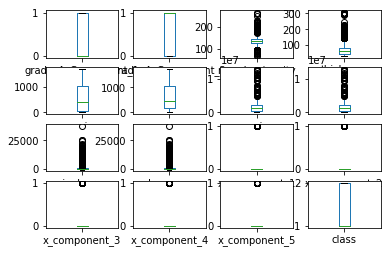

In [6]:
# missingcheck(df)
# missingcheck(tf)
df.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False)
plt.show()

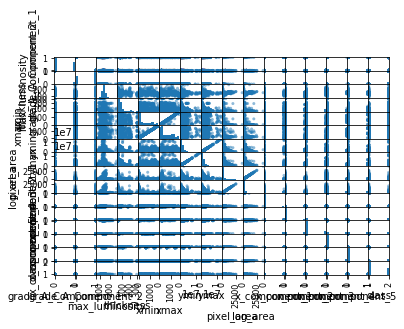

In [12]:
from pandas.plotting import scatter_matrix
scatter_matrix(df)
plt.show()

In [17]:
z = [i for i in range(1358)]

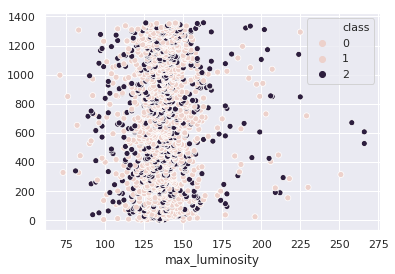

In [20]:
sns.set()
ax = sns.scatterplot(x="max_luminosity", y =df.index, hue ='class' ,data=df)

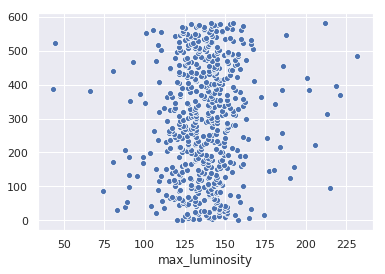

In [28]:
sns.set()
ax = sns.scatterplot(x="max_luminosity", y =tf.index ,data=tf)

In [7]:
df.describe()

,grade_A_Component_1,grade_A_Component_2,max_luminosity,thickness,xmin,xmax,ymin,ymax,pixel_area,log_area,x_component_1,x_component_2,x_component_3,x_component_4,x_component_5,class
count,1358.000000,1358.000000,1358.000000,1358.000000,1358.000000,1358.000000,1.358000e+03,1.358000e+03,1358.000000,1358.000000,1358.000000,1358.000000,1358.000000,1358.000000,1358.000000,1358.000000
mean,0.406480,0.593520,137.893225,78.977909,567.370398,614.032401,1.660107e+06,1.660139e+06,1903.402798,1903.896240,0.081738,0.106038,0.197349,0.035346,0.027982,1.346834
std,0.491357,0.491357,20.480512,55.324842,522.013094,500.505513,1.778153e+06,1.778177e+06,3839.156721,3839.163241,0.274066,0.308000,0.398145,0.184721,0.164983,0.476138
min,0.000000,0.000000,71.000000,35.000000,0.000000,4.000000,7.527000e+03,7.453000e+03,3.000000,3.445293,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,127.000000,42.000000,53.000000,192.000000,4.662742e+05,4.666918e+05,234.000000,234.335948,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,1.000000,137.000000,66.000000,407.500000,457.000000,1.216168e+06,1.214700e+06,346.000000,346.044490,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,1.000000,146.000000,83.000000,1041.750000,1064.000000,2.210012e+06,2.210076e+06,915.250000,915.367817,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,1.000000,1.000000,266.000000,305.000000,1692.000000,1717.000000,1.291748e+07,1.291731e+07,37392.000000,37392.672970,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000


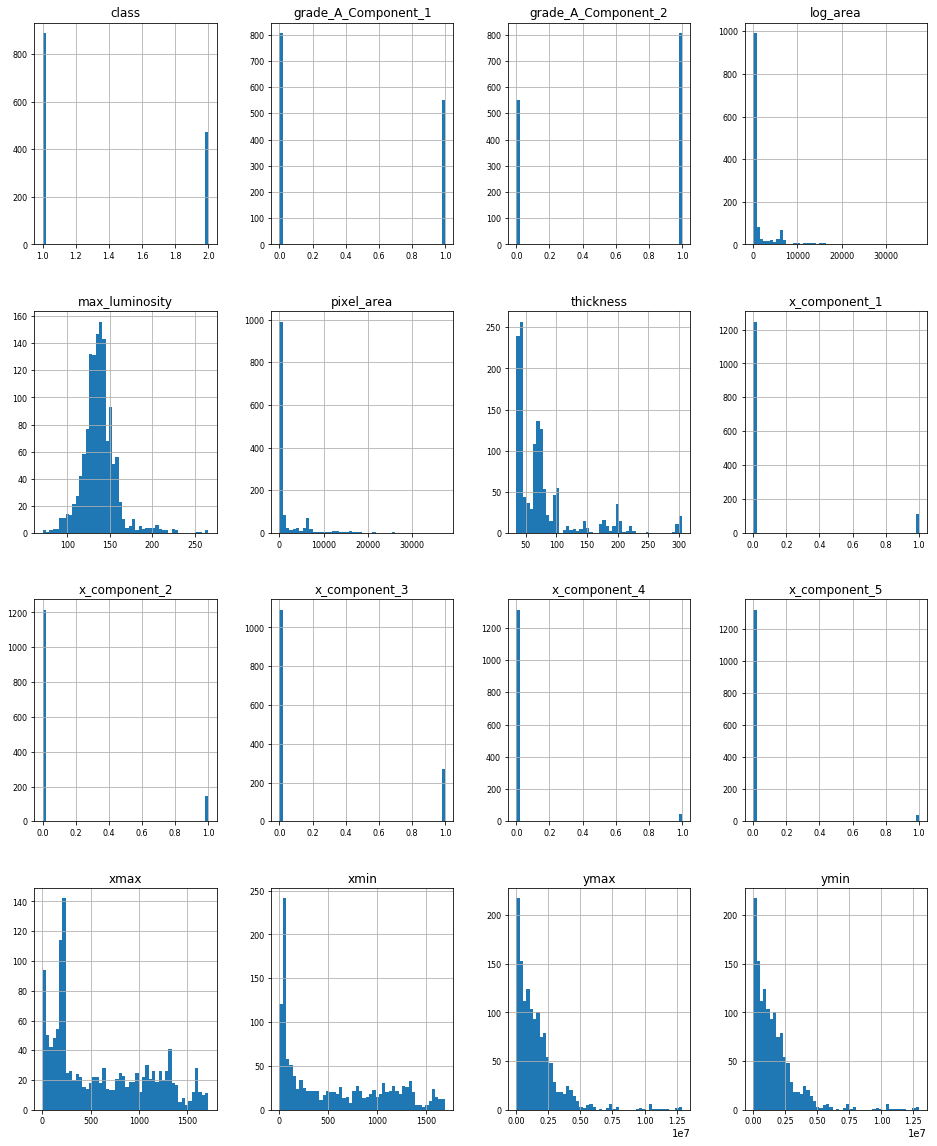

In [8]:
df.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8); # ; avo

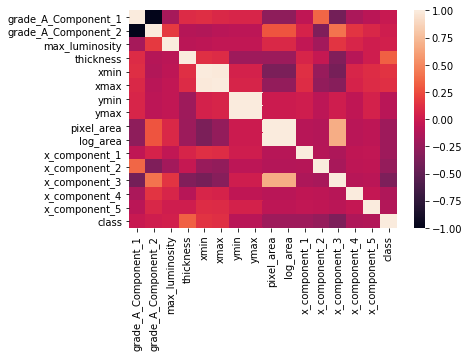

In [9]:
corr =df.corr()
sns.heatmap(corr)

In [10]:
from collections import Counter

In [ ]:
Counter(df['class'])

In [ ]:
Counter(df['grade_A_Component_1'])

In [ ]:
y = df['class']

# To keep things simple, we'll use only numerical predictors
X = df.drop(['class'], axis=1)

X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.75, test_size=0.25,random_state=0)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier


from sklearn.metrics import log_loss
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report
    
# Function for comparing different approaches
def score_dataset(X_train, X_valid, y_train, y_valid):
    
    
    clf1 = RandomForestClassifier()
    clf1.fit(X_train,y_train)
    
    
    
    preds = clf1.predict(X_valid)
    
    target_names = ['class_0','class_1']
    print(classification_report(y_valid, preds, target_names=target_names,labels= [0,1]))
    return log_loss(y_valid,preds,) 

In [ ]:
score_dataset(X_train,X_valid,y_train,y_valid)

In [ ]:
clf = RandomForestClassifier()
clf.fit(X,y)

In [ ]:
pred = clf.predict_proba(tf)

In [ ]:
testing = pd.DataFrame(data= pred
                         , columns=sf.columns)

In [ ]:
testing.to_excel(excel_writer = "../MachinehackGlassQualityPrediction/testing.xlsx")